# Zomato Data Analysis 

# Step 1 - Importing Libraries

In [102]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# Step 2 - Create the data frame

In [103]:
dataframe = pd.read_csv("Zomato data .csv")
#print(dataframe)
print(dataframe.head(10))
print(dataframe['rate'].dtype)

                                              name online_order book_table  \
0                                            Jalsa          Yes        Yes   
1                                   Spice Elephant          Yes         No   
2                                  San Churro Cafe          Yes         No   
3                            Addhuri Udupi Bhojana           No         No   
4                                    Grand Village           No         No   
5                                  Timepass Dinner          Yes         No   
6  Rosewood International Hotel - Bar & Restaurant           No         No   
7                                           Onesta          Yes        Yes   
8                                   Penthouse Cafe          Yes         No   
9                                        Smacznego          Yes         No   

    rate  votes  approx_cost(for two people) listed_in(type)  
0  4.1/5    775                          800          Buffet  
1  4.1/5    787

# Step 3 - Data cleaning

In [104]:
# Step 1: Check for missing values and duplicates
print("Missing values:\n", dataframe.isnull().sum())
print("\nDuplicate rows:", dataframe.duplicated().sum())

Missing values:
 name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

Duplicate rows: 0


In [105]:
# Step2 : Convert all values in the 'rate' column to strings first, then split and convert to float
dataframe['rate'] = dataframe['rate'].astype(str).str.split('/').str[0]  # Convert to string and take the first part before '/'
dataframe['rate'] = dataframe['rate'].astype(float)  # Convert the cleaned values to float

# Check the first 5 rows to verify the conversion
print(dataframe.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [106]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# questions

In [107]:
# Q1. What type of restaurant do the majority of customers order from? 

In [108]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'type of restaurant')

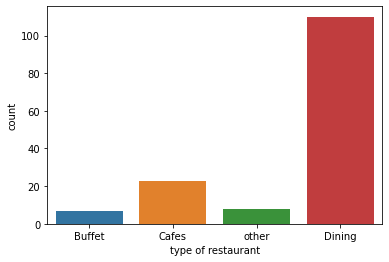

In [109]:
sns.countplot(x= dataframe["listed_in(type)"])
plt.xlabel("type of restaurant")

# conclusion - majority of the resturant falls in dining category

In [110]:
# Q2. How many votes has each type of restaurant received from customers?

In [111]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'Votes')

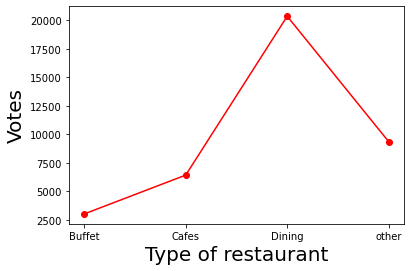

In [112]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c = "red" , marker = "o")
plt.xlabel("Type of restaurant" ,c = "black" ,size = 20)
plt.ylabel("Votes" ,c = "black" ,size = 20)

# Conclusion - dinning resturant has received maximum votes

In [113]:
# Q3. What are the ratings that the majority of restaurants have received?

In [114]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


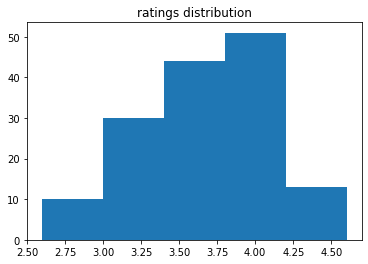

In [115]:
plt.hist(dataframe['rate'],bins=5)
plt.title('ratings distribution')
plt.show()

# Conclusion - the majority resturant received ratings from 3.5 to 4

In [116]:
# Q4. Zomato has observed that most couples order most of their food online.What is their average spending on each order?

In [117]:
#Average order spending by couples
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Average order spending by couples')

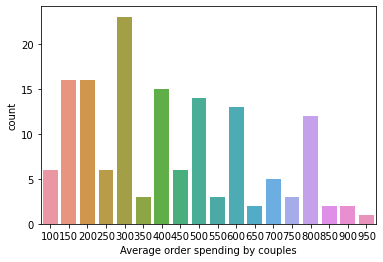

In [118]:
sns.countplot(x = dataframe["approx_cost(for two people)"])
plt.xlabel("Average order spending by couples")

# Conclusion - the majority of couple prefer resturants with an approximate cost of 300 rupees  

In [119]:
# Q5. Which mode(online or offline)has received the maximum rating?

In [120]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<AxesSubplot:xlabel='online_order', ylabel='rate'>

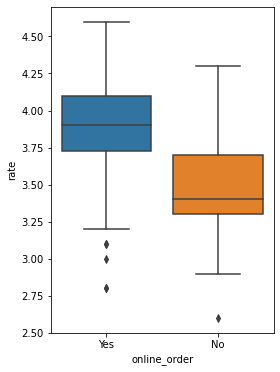

In [121]:
plt.figure(figsize = (4,6))
sns.boxplot(x = 'online_order',y='rate',data=dataframe)

# Conclusion - offline order received lower rating campare to online rating 

In [122]:
# Q6. which type of restaurant received more offline orders,so that zomato can provide those customers with some good offers?

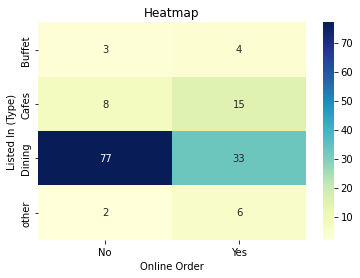

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the pivot table
pivot_table = dataframe.pivot_table(index="listed_in(type)", columns='online_order', aggfunc='size', fill_value=0)

# Create the heatmap
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt="d")

# Add labels and title
plt.title("Heatmap")
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')

# Show the plot
plt.show()


# Conclusion - Dining restaurants primarily accept offline orders,whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants,but prefer online ordering at cafes.